In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_in_India"
response = requests.get(url)
response = response.content
html = soup(response,'html5lib')
corona_dates = html.findAll('div',{'class': 'barbox tright'})
corona_dates = corona_dates[0]
Date = corona_dates.findAll('td',{'colspan':'2'})
Date = [ct.text for ct in Date]
Date = Date[8:]
patients = corona_dates.findAll('span',{'class' : 'cbs-ibr'})
Total_case = []
Death = []

Number = [ct.text for ct in patients]

length = len(Number)



for i in range(length):
    if(i%2==0):
        Total_case.append(Number[i])
    else:
        Death.append(Number[i])

# Total Death upto date        
Death = Death[7:]
Deaths = []
for i in Death:
    i = i.replace(',','')
    Deaths.append(i)
Deaths = [int(i) for i in Deaths]

#Total Cases Upto date

Total_case = Total_case[7:]
Total_cases = []
for i in Total_case:
    i = i.replace(',','')
    Total_cases.append(i)
Total_cases = [int(i) for i in Total_cases]


Total_detail = { 'Date' : Date,
                  'No. of Cases' : Total_cases,
                  'No. of Deaths' : Deaths
                }
df = pd.DataFrame(Total_detail)
df["New Cases"] = df['No. of Cases'].diff(1)
df["New Death"] = df['No. of Deaths'].diff(1)


df.fillna({'New Cases':0}, inplace=True)
df.fillna({'New Death':0}, inplace=True)
df.astype({'New Cases': np.int64,'New Death':np.int64})


,Date,No. of Cases,No. of Deaths,New Cases,New Death
0,2020-03-02,5,0,0,0
1,2020-03-03,6,0,1,0
2,2020-03-04,28,0,22,0
3,2020-03-05,30,0,2,0
4,2020-03-06,31,0,1,0
5,2020-03-07,34,0,3,0
6,2020-03-08,39,0,5,0
7,2020-03-09,44,0,5,0
8,2020-03-10,50,0,6,0
9,2020-03-11,60,0,10,0


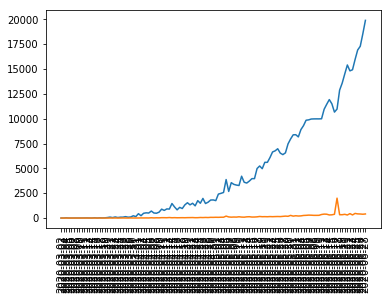

In [113]:
plt.plot(df['Date'],df['New Cases'],label="No.ofcases")
plt.plot(df['Date'],df['New Death'],label="No.ofDeaths")
plt.xticks(rotation=90)
plt.show()

In [58]:
import plotly.graph_objects as go
import plotly.express as px
#fig = px.line(df, x='Date', y='New Cases')
#fig = px.scatter(x=df['Date'], y=df['New Death'])
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Date'], y=df['New Cases']))
#fig = px.scatter(df,x='Date', y='New Death',color='New Death',width=1000,mode='maker')
fig.update_layout(title='New Cases daily')
fig.show()

In [25]:
# Cases over States
S_table = html.findAll('table',{'class':'wikitable plainrowheaders sortable'})
S_table = S_table[0]
State = S_table.findAll('th',{'scope':'row'})